## Imports

In [24]:
import os
import pandas as pd
import sqlite3
from snps import SNPs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### GWAS

In [12]:
gwas = pd.read_csv("db/adhd_jul2017", sep='\t')

In [20]:
# look at 1000 rsids with smallest p-value
gwas_small = gwas.sort_values("P")[:1000]

In [21]:
gwas_small.head(10)

,CHR,SNP,BP,A1,A2,INFO,OR,SE,P
109899,1,rs11420276,44184192,G,GT,0.982,1.11316,0.0146,2.143000e-13
109884,1,rs112984125,44173423,A,G,0.984,0.89942,0.0146,3.581000e-13
109894,1,rs17531412,44182244,A,G,0.990,1.11138,0.0145,3.612000e-13
109908,1,rs12410155,44188465,A,C,0.990,1.11138,0.0145,3.626000e-13
109897,1,rs112361411,44183923,T,C,0.990,0.89987,0.0145,3.722000e-13
109911,1,rs58097850,44189311,C,CT,0.990,1.11127,0.0145,3.826000e-13
109909,1,rs12410444,44188719,A,G,0.990,1.11127,0.0145,3.850000e-13
109924,1,rs11275853,44196194,GTTTCTGATTTCT+1,G,0.986,1.11104,0.0145,4.539000e-13
109907,1,rs11810109,44186812,A,T,0.989,1.10982,0.0145,7.140000e-13
109871,1,rs2270972,44158129,C,G,0.990,1.10893,0.0145,1.043000e-12


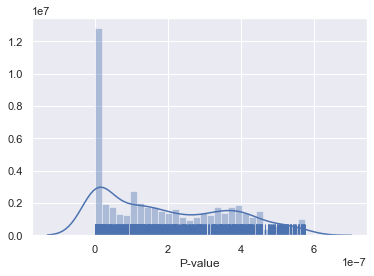

In [30]:
sns.distplot(gwas_small.P, rug=True, bins=30, axlabel="P-value");

### OpenCravat results

Restricted to ADHD-relevant genes.

In [7]:
dfs = {}
for i in os.listdir("ADHD_analysis"):
    if i in [".DS_store", ".ipynb_checkpoints"]:
        continue
    try:
        s = SNPs(f"ADHD_analysis/{i}")
    except UnicodeDecodeError:
        continue
    dfs[i] = s.snps


In [8]:
FILE = "db/ADHD_variant_genes.tsv"
df = pd.read_csv(FILE, sep='\t')
df.head()

,Chrom,Position,Ref_Base,Alt_Base,Note,Coding,Hugo,Sequence_Ontology,Protein_Change,Samples,Chrom.1,Position.1,Disease_Names,Phenotype,Global_AF,Chemical,Zygosity
0,chr1,43708410,G,A,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43946668,NaN,NaN,0.435,NaN,het;hom;het;het
1,chr1,43712399,T,G,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2,chr1,43950657,NaN,NaN,0.784,NaN,hom;het;het
2,chr1,43729682,G,C,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43967940,NaN,NaN,NaN,NaN,hom;hom;het;het
3,chr1,43734985,C,A,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43973243,NaN,NaN,NaN,NaN,het;het;het;het
4,chr1,43734985,C,G,NaN,NaN,ST3GAL3,intron,NaN,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,43973243,NaN,NaN,NaN,NaN,het;het;het;het


In [9]:
df.Hugo.unique()

array(['ST3GAL3', 'SPAG16', 'DRD5', 'PCDH7', 'FOXP2', 'DBH', 'SORCS3',
       'DRD4', 'DUSP6', 'SEMA6D', 'MAOA'], dtype=object)

## Variants

In [62]:
bigdf = pd.concat(dfs.values(), keys=dfs.keys())
rsids = """rs11420276
rs1222063
rs9677504
rs4858241
rs28411770
rs4916723
rs5886709
rs74760947
rs11591402
rs1427829
rs281324
rs212178""".split("\n")
keys = list(dfs.keys())
bigdf = bigdf.reset_index().rename(columns={"level_0": "filename"})

In [68]:
bigdf.sample(10)

,filename,rsid,chrom,pos,genotype
4722069,60.23andme.txt,rs4861067,4,40518211,GG
994742,561.23andme.txt,rs4908501,1,8554471,TT
894637,678.23andme.txt,rs892051,19,22689387,CC
7036088,865.23andme.txt,rs1375977,11,26859639,AA
4982101,60.23andme.txt,rs1154961,8,123154424,AA
2202773,genome_Susan_Loftus_v3_Full_20200212185613 2.txt,rs961295,4,113933776,GG
1355761,561.23andme.txt,rs9362469,6,88901994,CC
4198972,genome_Alexander_Loftus_v4_Full_20200127140315...,rs12351772,9,83000227,CC
1408237,561.23andme.txt,rs10254080,7,74137214,CC
1684139,561.23andme.txt,rs9567982,13,48605441,AG


In [69]:
bigdf.filename.unique()

array(['678.23andme.txt', '561.23andme.txt',
       'genome_Susan_Loftus_v3_Full_20200212185613 2.txt',
       '8.23andme.txt',
       'genome_Alexander_Loftus_v4_Full_20200127140315.txt',
       '60.23andme.txt', 'genome_Emma_Loftus_v3_Full_20200324162732.txt',
       '865.23andme.txt', '616.23andme.txt'], dtype=object)

In [36]:
from collections import defaultdict

In [37]:
c = defaultdict(int)
for j in keys:
    for i in rsids:
        try:
            c[i] += 1
            print(bigdf.loc[j, i])
        except KeyError:
            c[i] = 0
            continue

chrom              5
pos         87854395
genotype          CC
Name: (678.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87854395
genotype          CC
Name: (561.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87854395
genotype          CC
Name: (genome_Susan_Loftus_v3_Full_20200212185613 2.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AC
Name: (8.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AA
Name: (60.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87854395
genotype          AC
Name: (genome_Emma_Loftus_v3_Full_20200324162732.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AA
Name: (865.23andme.txt, rs4916723), dtype: object
chrom              5
pos         87890151
genotype          AC
Name: (616.23andme.txt, rs4916723), dtype: object


### 23andme does not appear to record most of these on its GWAS

In [52]:
bigdf.index

MultiIndex([('678.23andme.txt',  'rs4477212'),
            ('678.23andme.txt',  'rs3094315'),
            ('678.23andme.txt',  'rs3131972'),
            ('678.23andme.txt', 'rs12562034'),
            ('678.23andme.txt', 'rs12124819'),
            ('678.23andme.txt', 'rs11240777'),
            ('678.23andme.txt',  'rs6681049'),
            ('678.23andme.txt',  'rs4970383'),
            ('678.23andme.txt',  'rs4475691'),
            ('678.23andme.txt',  'rs7537756'),
            ...
            ('616.23andme.txt',   'i3001927'),
            ('616.23andme.txt',   'i4000690'),
            ('616.23andme.txt',  'rs3937033'),
            ('616.23andme.txt',   'i3001542'),
            ('616.23andme.txt',   'i4000693'),
            ('616.23andme.txt',   'i4000757'),
            ('616.23andme.txt',   'i4990307'),
            ('616.23andme.txt',   'i4000756'),
            ('616.23andme.txt',   'i4000755'),
            ('616.23andme.txt',   'i4000759')],
           names=[None, 'rsid'], length=835

In [51]:
bigdf.index.levels[0].shape

(9,)

In [38]:
c

defaultdict(int,
            {'rs11420276': 0,
             'rs1222063': 0,
             'rs9677504': 0,
             'rs4858241': 0,
             'rs28411770': 0,
             'rs4916723': 4,
             'rs5886709': 0,
             'rs74760947': 0,
             'rs11591402': 0,
             'rs1427829': 0,
             'rs281324': 0,
             'rs212178': 0})

## Genes

In [115]:
genes = """ST3GAL3
SPAG16
PCDH7
LINC00461
FOXP2
LINC01288
SORCS3
DUSP6
SEMA6D
DRD4
DAT1
DBH
MAOA
DRD5""".split("\n")
# df[df["Hugo"] == "FOXP2"]
df[df["Hugo"] == "FOXP2"].Samples.str.split(";", expand=True)
gdfs = {g: df[df["Hugo"] == g] for g in genes}

In [139]:
gdfs.keys()

dict_keys(['ST3GAL3', 'SPAG16', 'PCDH7', 'LINC00461', 'FOXP2', 'LINC01288', 'SORCS3', 'DUSP6', 'SEMA6D', 'DRD4', 'DAT1', 'DBH', 'MAOA', 'DRD5'])

In [142]:
for k, v in gdfs.items():
    _df = v[gdfs[k].Chrom == "chr7"]
    print(_df[(_df['Position.1'] >= 114446081) & (_df['Position.1'] <= 114446081)])

Empty DataFrame
Columns: [Chrom, Position, Ref_Base, Alt_Base, Note, Coding, Hugo, Sequence_Ontology, Protein_Change, Samples, Chrom.1, Position.1, Disease_Names, Phenotype, Global_AF, Chemical, Zygosity]
Index: []
Empty DataFrame
Columns: [Chrom, Position, Ref_Base, Alt_Base, Note, Coding, Hugo, Sequence_Ontology, Protein_Change, Samples, Chrom.1, Position.1, Disease_Names, Phenotype, Global_AF, Chemical, Zygosity]
Index: []
Empty DataFrame
Columns: [Chrom, Position, Ref_Base, Alt_Base, Note, Coding, Hugo, Sequence_Ontology, Protein_Change, Samples, Chrom.1, Position.1, Disease_Names, Phenotype, Global_AF, Chemical, Zygosity]
Index: []
Empty DataFrame
Columns: [Chrom, Position, Ref_Base, Alt_Base, Note, Coding, Hugo, Sequence_Ontology, Protein_Change, Samples, Chrom.1, Position.1, Disease_Names, Phenotype, Global_AF, Chemical, Zygosity]
Index: []
Empty DataFrame
Columns: [Chrom, Position, Ref_Base, Alt_Base, Note, Coding, Hugo, Sequence_Ontology, Protein_Change, Samples, Chrom.1, Posi

### variants in coding regions

In [157]:
coding = df[df.Coding.notna()]

In [158]:
len(coding)

58

In [174]:
coding.head()

,Chrom,Position,Ref_Base,Alt_Base,Note,Coding,Hugo,Sequence_Ontology,Protein_Change,Samples,Chrom.1,Position.1,Disease_Names,Phenotype,Global_AF,Chemical,Zygosity
48,chr1,43824858,T,A,NaN,Yes,ST3GAL3,synonymous,T128T,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr1,44063117,NaN,NaN,NaN,NaN,het;hom;het;het
49,chr1,43824858,T,G,NaN,Yes,ST3GAL3,missense,T128A,60.23andme.27;616.23andme.288;8.23andme.2,chr1,44063117,NaN,NaN,NaN,NaN,het;het;het
162,chr2,213862497,G,A,NaN,Yes,SPAG16,synonymous,Q361Q,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr2,214435466,NaN,NaN,NaN,NaN,hom;hom;het;hom
172,chr2,213930019,T,C,NaN,Yes,SPAG16,missense,K425T,60.23andme.27;8.23andme.2;865.23andme.427,chr2,214502988,NaN,NaN,NaN,NaN,hom;het;hom
323,chr4,9782741,C,G,NaN,Yes,DRD5,synonymous,V238V,60.23andme.27;616.23andme.288;8.23andme.2;865....,chr4,9393463,NaN,NaN,NaN,NaN,hom;hom;hom;hom


In [173]:
count_df = coding.groupby("Hugo").count()
count_df.sort_values(by="Coding", ascending=False)

,Chrom,Position,Ref_Base,Alt_Base,Note,Coding,Sequence_Ontology,Protein_Change,Samples,Chrom.1,Position.1,Disease_Names,Phenotype,Global_AF,Chemical,Zygosity
Hugo,,,,,,,,,,,,,,,,
DBH,13,13,13,13,0,13,13,13,13,13,13,1,0,1,0,13
MAOA,11,11,11,11,0,11,11,11,11,11,11,0,0,0,0,11
DRD4,8,8,8,8,0,8,8,8,8,8,8,0,0,1,0,8
DUSP6,6,6,6,6,0,6,6,6,6,6,6,0,0,0,0,6
SEMA6D,6,6,6,6,0,6,6,6,6,6,6,0,0,1,0,6
SPAG16,4,4,4,4,0,4,4,4,4,4,4,0,0,0,0,4
SORCS3,3,3,3,3,0,3,3,3,3,3,3,0,0,0,0,3
DRD5,2,2,2,2,0,2,2,2,2,2,2,0,0,0,0,2
PCDH7,2,2,2,2,0,2,2,2,2,2,2,0,0,0,0,2
